In [20]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models
from scipy import optimize
from scipy.optimize import curve_fit

In [21]:
data = pd.read_csv('doppler_broad_new.csv')
voltage = np.array(data['voltage'])
time = np.array(data['time'])

In [22]:
df = pd.DataFrame({'time': time, 'voltage' : voltage})

df

,time,voltage
0,0.00840,0.354
1,0.00844,0.356
2,0.00848,0.360
3,0.00852,0.362
4,0.00856,0.364
...,...,...
2495,0.10820,0.294
2496,0.10824,0.294
2497,0.10828,0.292
2498,0.10832,0.294


## Find peaks



In [35]:
def gaussian(time, A, mu, sigma):
    return A* np.exp(-(time - mu)**2 / (2 * sigma**2))
def lijn(time, a, b):
    return a*time + b

gauss1 = models.Model(gaussian, prefix='p1_') 
gauss2 = models.Model(gaussian, prefix='p2_') 
gauss3 = models.Model(gaussian, prefix='p3_') 
gauss4 = models.Model(gaussian, prefix='p4_')
# gauss5 = models.Model(gaussian, prefix='p5_')
linfunctie = models.Model(lijn, name="lijn")

curve_model = gauss1 + gauss2 + gauss3 + gauss4 + linfunctie


In [38]:

params = curve_model.make_params(p1_A = -11, p1_mu=0.03, p1_sigma=0.003, p2_A = -10, p2_mu=0.04, p2_sigma=0.003, p3_A = 3, p3_mu=0.075, p3_sigma=0.003, p4_A=4, p4_mu=0.1, p4_sigma=0.003,a=-3,b=1)
fit_result = curve_model.fit(df['voltage'], params,time = df['time'] )

Text(0, 0.5, 'voltage (V)')

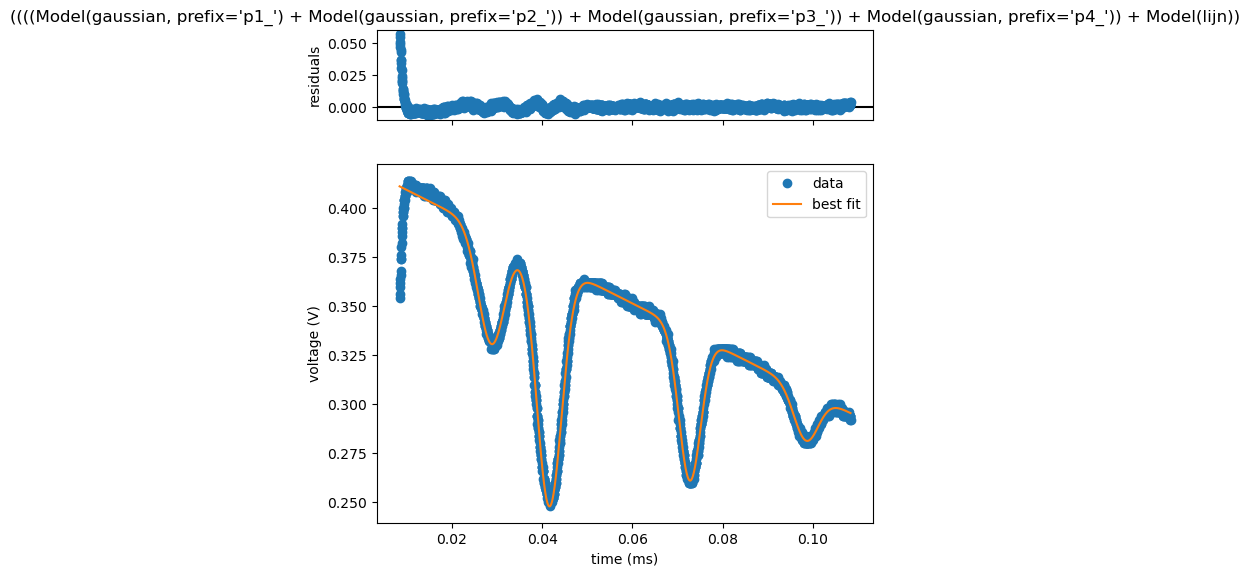

In [39]:
fit_result.plot()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")


<function scipy.optimize._optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)>

In [40]:
fit_result